In [1]:
import numpy as np
import pandas as pd
import streamlit as st
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
subway_delay_df1 = pd.read_excel("data/ttc-subway-delay-jan-2014-april-2017.xlsx")
subway_delay_df2 = pd.read_excel("data/ttc-subway-delay-may-december-2017.xlsx")
subway_delay_df3 = pd.read_excel("data/ttc-subway-delay-data-2018.xlsx")
subway_delay_df4 = pd.read_excel("data/ttc-subway-delay-data-2019.xlsx")
subway_delay_df5 = pd.read_excel("data/ttc-subway-delay-data-2020.xlsx")
subway_delay_df6 = pd.read_excel("data/ttc-subway-delay-data-2021.xlsx")
subway_delay_df7 = pd.read_excel("data/ttc-subway-delay-data-2022.xlsx")

In [3]:
frames = [subway_delay_df1, subway_delay_df2, subway_delay_df3, subway_delay_df4, 
          subway_delay_df5, subway_delay_df6, subway_delay_df7]
subway_delay_data = pd.concat(frames, ignore_index = True)

In [4]:
subway_delay_data.head

<bound method NDFrame.head of             Date   Time        Day                Station   Code  Min Delay  \
0     2014-01-01  00:21  Wednesday  VICTORIA PARK STATION  MUPR1         55   
1     2014-01-01  02:06  Wednesday      HIGH PARK STATION   SUDP          3   
2     2014-01-01  02:40  Wednesday       SHEPPARD STATION  MUNCA          0   
3     2014-01-01  03:10  Wednesday      LANSDOWNE STATION   SUDP          3   
4     2014-01-01  03:20  Wednesday          BLOOR STATION  MUSAN          5   
...          ...    ...        ...                    ...    ...        ...   
95160 2022-11-30  00:55  Wednesday         WILSON STATION   MUIS          0   
95161 2022-11-30  01:43  Wednesday     VAUGHAN MC STATION   MUIS          0   
95162 2022-11-30  07:40  Wednesday         LESLIE STATION   EUSC          7   
95163 2022-11-30  14:41  Wednesday      DON MILLS STATION   SUDP          0   
95164 2022-11-30  22:24  Wednesday         LESLIE STATION  PUSNT          3   

       Min Gap Bound 

In [5]:
subway_delay_data = subway_delay_data.rename(columns={'Min Delay': 'Min_Delay', 
                                                      'Min Gap': 'Min_Gap', 'Day': 'DayOfWeek'})

subway_delay_data                                                      

,Date,Time,DayOfWeek,Station,Code,Min_Delay,Min_Gap,Bound,Line,Vehicle
0,2014-01-01,00:21,Wednesday,VICTORIA PARK STATION,MUPR1,55,60,W,BD,5111
1,2014-01-01,02:06,Wednesday,HIGH PARK STATION,SUDP,3,7,W,BD,5001
2,2014-01-01,02:40,Wednesday,SHEPPARD STATION,MUNCA,0,0,NaN,YU,0
3,2014-01-01,03:10,Wednesday,LANSDOWNE STATION,SUDP,3,8,W,BD,5116
4,2014-01-01,03:20,Wednesday,BLOOR STATION,MUSAN,5,10,S,YU,5386
...,...,...,...,...,...,...,...,...,...,...
95160,2022-11-30,00:55,Wednesday,WILSON STATION,MUIS,0,0,NaN,YU,0
95161,2022-11-30,01:43,Wednesday,VAUGHAN MC STATION,MUIS,0,0,NaN,YU,0
95162,2022-11-30,07:40,Wednesday,LESLIE STATION,EUSC,7,12,W,SHP,6181
95163,2022-11-30,14:41,Wednesday,DON MILLS STATION,SUDP,0,0,NaN,SHP,0


In [6]:
delay_codes = pd.read_excel("data/ttc-subway-delay-codes.xlsx")

In [7]:
delay_codes.head

<bound method NDFrame.head of     SUB RMENU CODE                     CODE DESCRIPTION
0             EUAC                     Air Conditioning
1             EUAL                  Alternating Current
2            EUATC                   ATC RC&S Equipment
3             EUBK                               Brakes
4             EUBO                                 Body
..             ...                                  ...
195          TRNOA   No Operator Immediately Available 
196            TRO    Transportation Department - Other
197          TRSET  Train Controls Improperly Shut Down
198           TRST                         Storm Trains
199           TRTC     Transit Control Related Problems

[200 rows x 2 columns]>

In [8]:
delay_codes = delay_codes.rename(columns={'SUB RMENU CODE': 'RMENU_CODE', 'CODE DESCRIPTION': 'CODE_DESCRIPTION'})

In [9]:
merged_subway_delay_data = subway_delay_data.copy()

In [10]:
merged_subway_delay_data['CODE_DESCRIPTION'] = merged_subway_delay_data['Code'].map(
                                                delay_codes.set_index('RMENU_CODE')['CODE_DESCRIPTION'])

In [11]:
merged_subway_delay_data.head

<bound method NDFrame.head of             Date   Time  DayOfWeek                Station   Code  Min_Delay  \
0     2014-01-01  00:21  Wednesday  VICTORIA PARK STATION  MUPR1         55   
1     2014-01-01  02:06  Wednesday      HIGH PARK STATION   SUDP          3   
2     2014-01-01  02:40  Wednesday       SHEPPARD STATION  MUNCA          0   
3     2014-01-01  03:10  Wednesday      LANSDOWNE STATION   SUDP          3   
4     2014-01-01  03:20  Wednesday          BLOOR STATION  MUSAN          5   
...          ...    ...        ...                    ...    ...        ...   
95160 2022-11-30  00:55  Wednesday         WILSON STATION   MUIS          0   
95161 2022-11-30  01:43  Wednesday     VAUGHAN MC STATION   MUIS          0   
95162 2022-11-30  07:40  Wednesday         LESLIE STATION   EUSC          7   
95163 2022-11-30  14:41  Wednesday      DON MILLS STATION   SUDP          0   
95164 2022-11-30  22:24  Wednesday         LESLIE STATION  PUSNT          3   

       Min_Gap Bound 

In [12]:
# merged_subway_delay_data.to_csv('ttc_subway_delay_data_2014_to_2022.csv', index=False)

In [12]:
most_delayed_subways = merged_subway_delay_data.sort_values(by='Min_Delay', ascending=False).head(20)

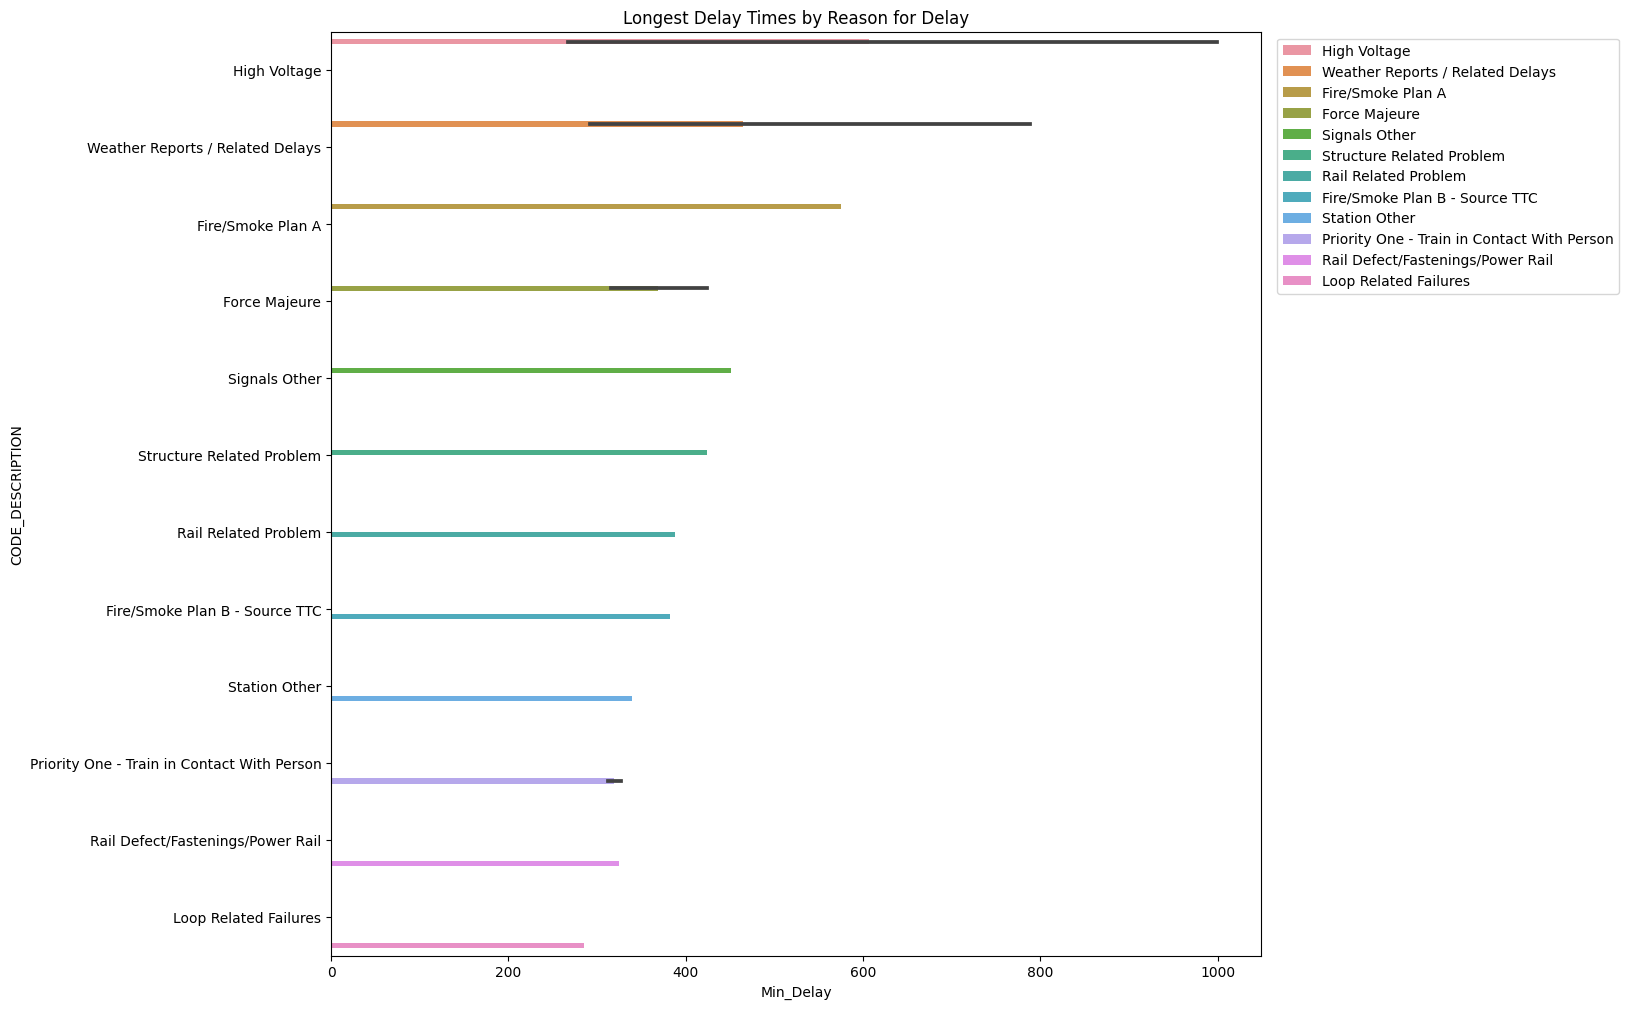

In [13]:
plt.figure(figsize=(12, 12))

sns.barplot(x = 'Min_Delay',
            y = 'CODE_DESCRIPTION', 
            hue = 'CODE_DESCRIPTION',
            data = most_delayed_subways)

plt.title('Longest Delay Times by Reason for Delay')
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.5)

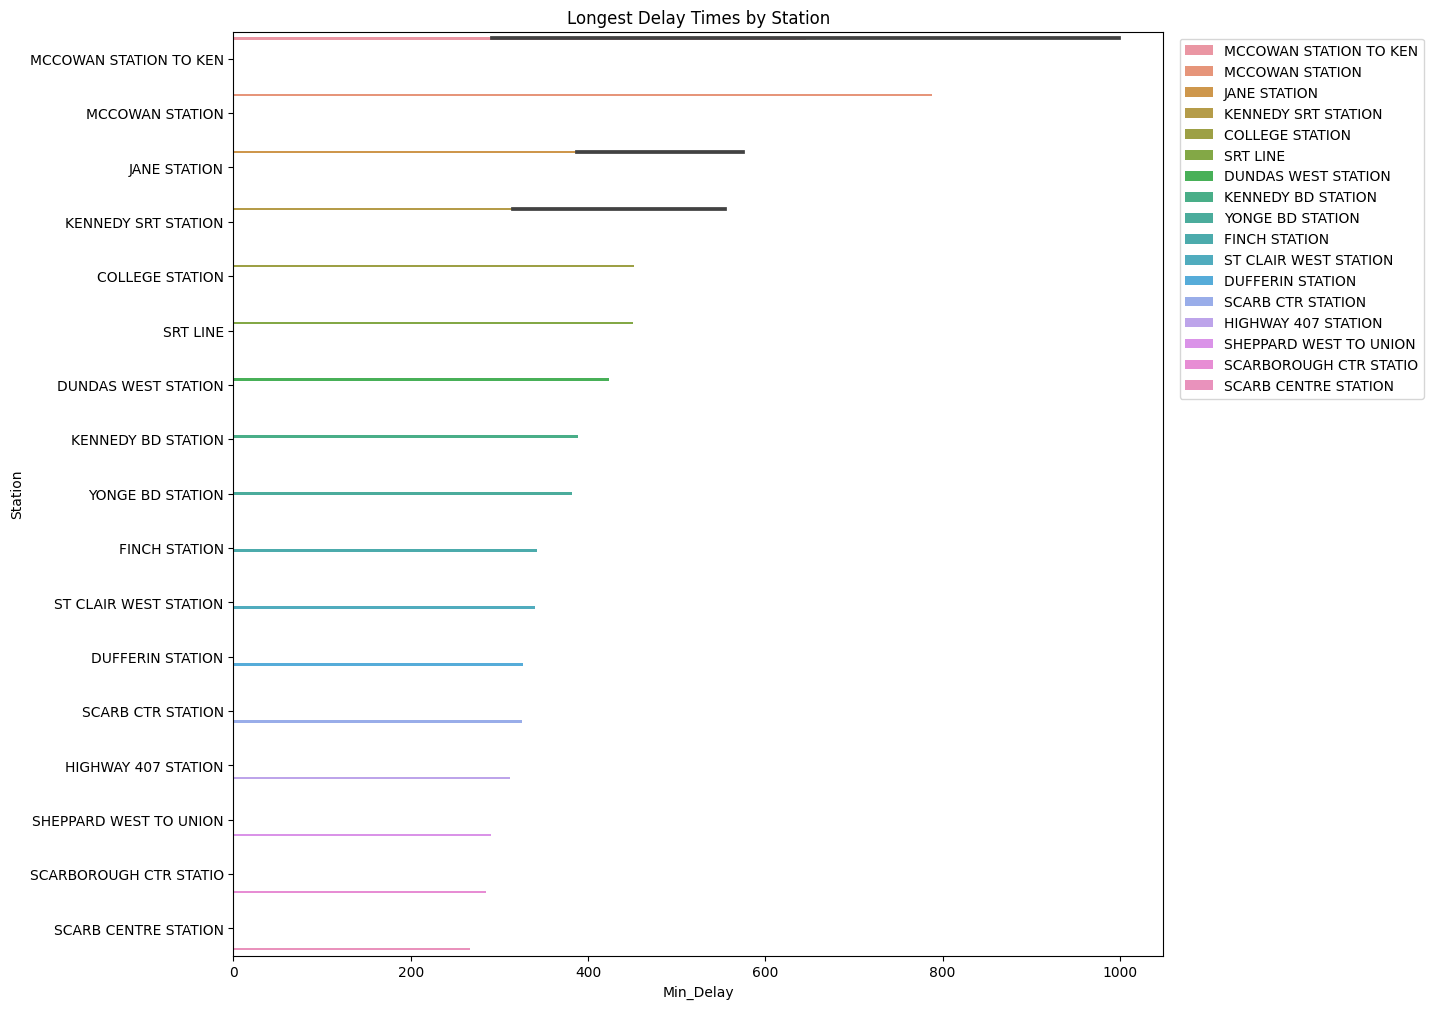

In [15]:
plt.figure(figsize=(12, 12))

sns.barplot(x = 'Min_Delay',
            y = 'Station', 
            hue = 'Station',
            data = most_delayed_subways)

plt.title('Longest Delay Times by Station')
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.5)

In [14]:
def split_date(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df['Year'] = df.Date.dt.year
    df['Month'] = df.Date.dt.month
    df['DayOfMonth'] = df.Date.dt.day
    df['WeekOfYear'] = df.Date.dt.isocalendar().week

In [15]:
split_date(subway_delay_data)

In [16]:
subway_delay_data[['Hour', 'Minute']] = subway_delay_data['Time'].str.split(":", expand=True)

In [17]:
subway_delay_data["Hour"] = pd.to_numeric(subway_delay_data["Hour"])
subway_delay_data["Minute"] = pd.to_numeric(subway_delay_data["Minute"])
subway_delay_data

,Date,Time,DayOfWeek,Station,Code,Min_Delay,Min_Gap,Bound,Line,Vehicle,Year,Month,DayOfMonth,WeekOfYear,Hour,Minute
0,2014-01-01,00:21,Wednesday,VICTORIA PARK STATION,MUPR1,55,60,W,BD,5111,2014,1,1,1,0,21
1,2014-01-01,02:06,Wednesday,HIGH PARK STATION,SUDP,3,7,W,BD,5001,2014,1,1,1,2,6
2,2014-01-01,02:40,Wednesday,SHEPPARD STATION,MUNCA,0,0,NaN,YU,0,2014,1,1,1,2,40
3,2014-01-01,03:10,Wednesday,LANSDOWNE STATION,SUDP,3,8,W,BD,5116,2014,1,1,1,3,10
4,2014-01-01,03:20,Wednesday,BLOOR STATION,MUSAN,5,10,S,YU,5386,2014,1,1,1,3,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95160,2022-11-30,00:55,Wednesday,WILSON STATION,MUIS,0,0,NaN,YU,0,2022,11,30,48,0,55
95161,2022-11-30,01:43,Wednesday,VAUGHAN MC STATION,MUIS,0,0,NaN,YU,0,2022,11,30,48,1,43
95162,2022-11-30,07:40,Wednesday,LESLIE STATION,EUSC,7,12,W,SHP,6181,2022,11,30,48,7,40
95163,2022-11-30,14:41,Wednesday,DON MILLS STATION,SUDP,0,0,NaN,SHP,0,2022,11,30,48,14,41


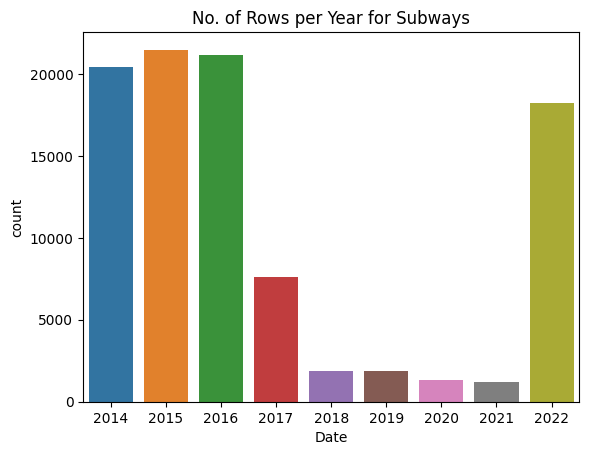

In [18]:
plt.title('No. of Rows per Year for Subways')
sns.countplot(x=pd.to_datetime(subway_delay_data.Date).dt.year);

In [ ]:
# from sklearn.preprocessing import MinMaxScaler

# sc_Month = MinMaxScaler()
# Month_ndarray = subway_delay_data['Month'].values
# Month_2D = Month_ndarray.reshape(-1, 1)
# subway_delay_data['Month'] = sc_Month.fit_transform(Month_2D)

# sc_DayOfMonth = MinMaxScaler()
# DayOfMonth_ndarray = subway_delay_data['DayOfMonth'].values
# DayOfMonth_2D = DayOfMonth_ndarray.reshape(-1, 1)
# subway_delay_data['DayOfMonth'] = sc_DayOfMonth.fit_transform(DayOfMonth_2D)

# sc_Hour = MinMaxScaler()
# Hour_ndarray = subway_delay_data['Hour'].values
# Hour_2D = Hour_ndarray.reshape(-1, 1)
# subway_delay_data['Hour'] = sc_Hour.fit_transform(Hour_2D)

# sc_Min_Gap = MinMaxScaler()
# Min_Gap_ndarray = subway_delay_data['Min_Gap'].values
# Min_Gap_2D = Min_Gap_ndarray.reshape(-1, 1)
# subway_delay_data['Min_Gap'] = sc_Min_Gap.fit_transform(Min_Gap_2D)

In [21]:
subway_delay_data['Line'].fillna('YU',inplace=True)
subway_delay_data.isna().sum()

Date              0
Time              0
DayOfWeek         0
Station           0
Code              0
Min_Delay         0
Min_Gap           0
Bound         21503
Line              0
Vehicle           0
Year              0
Month             0
DayOfMonth        0
WeekOfYear        0
Hour              0
Minute            0
dtype: int64

In [23]:
subway_delay_data['Bound'].value_counts
subway_delay_data.groupby('Bound').count()

,Date,Time,DayOfWeek,Station,Code,Min_Delay,Min_Gap,Line,Vehicle,Year,Month,DayOfMonth,WeekOfYear,Hour,Minute
Bound,,,,,,,,,,,,,,,
5,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
B,126,126,126,126,126,126,126,126,126,126,126,126,126,126,126
E,17704,17704,17704,17704,17704,17704,17704,17689,17704,17704,17704,17704,17704,17704,17704
N,16556,16556,16556,16556,16556,16556,16556,16551,16556,16556,16556,16556,16556,16556,16556
R,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
S,19981,19981,19981,19981,19981,19981,19981,19964,19981,19981,19981,19981,19981,19981,19981
W,19291,19291,19291,19291,19291,19291,19291,19280,19291,19291,19291,19291,19291,19291,19291
Y,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


In [24]:
from sklearn.preprocessing import OrdinalEncoder

DayOfWeek_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=np.nan)
DayOfWeek_ndarray = subway_delay_data['DayOfWeek'].values
DayOfWeek_2D = DayOfWeek_ndarray.reshape(-1, 1)
subway_delay_data['DayOfWeek'] = DayOfWeek_encoder.fit_transform(DayOfWeek_2D)

Station_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=np.nan)
Station_ndarray = subway_delay_data['Station'].values
Station_2D = Station_ndarray.reshape(-1, 1)
subway_delay_data['Station'] = Station_encoder.fit_transform(Station_2D)

Line_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=np.nan)
Line_ndarray = subway_delay_data['Line'].values
Line_2D = Line_ndarray.reshape(-1, 1)
subway_delay_data['Line'] = Line_encoder.fit_transform(Line_2D)

In [25]:
year = pd.to_datetime(subway_delay_data.Date).dt.year

train_df = subway_delay_data[year < 2017]
val_df = subway_delay_data[year == 2017]
test_df = subway_delay_data[year > 2017]

In [26]:
print(train_df.shape)
print(val_df.shape)
print(test_df.shape)
print(subway_delay_data.shape)

(63060, 16)
(7590, 16)
(24515, 16)
(95165, 16)


In [27]:
input_cols = ['DayOfWeek', 'Station', 'Min_Gap', 'Line', 'Month', 'DayOfMonth', 'Hour']
target_col = 'Min_Delay'

In [28]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()

In [29]:
train_inputs = train_inputs.fillna(0)
val_inputs = val_inputs.fillna(0)
test_inputs = test_inputs.fillna(0)

In [30]:
from sklearn.tree import DecisionTreeRegressor

In [31]:
decisionTreeModel = DecisionTreeRegressor(random_state = 44,
                                           max_depth = 5, 
                                           max_leaf_nodes = 28, 
                                           min_samples_leaf = 5, 
                                           min_samples_split = 5)

In [32]:
decisionTreeModel.fit(train_inputs, train_targets)

DecisionTreeRegressor(max_depth=5, max_leaf_nodes=28, min_samples_leaf=5,
                      min_samples_split=5, random_state=44)

In [33]:
decisionTreeModel.score(train_inputs, train_targets)

0.7642160450019664

In [34]:
decisionTreeModel.score(val_inputs, val_targets) 

0.9671403965142874

In [35]:
decisionTreeModel.score(test_inputs, test_targets)

0.8929896522484786

In [36]:
from sklearn.ensemble import RandomForestRegressor
randomForestModel = RandomForestRegressor(n_jobs=-1, 
                                           random_state=48, 
                                           n_estimators=80,
                                           max_features=7,
                                           max_depth=5,
                                           min_impurity_decrease=1e-9, 
                                           min_samples_leaf=5)

In [37]:
randomForestModel.fit(train_inputs, train_targets)

RandomForestRegressor(max_depth=5, max_features=7, min_impurity_decrease=1e-09,
                      min_samples_leaf=5, n_estimators=80, n_jobs=-1,
                      random_state=48)

In [38]:
randomForestModel.score(train_inputs, train_targets)

0.7444651005839381

In [39]:
randomForestModel.score(val_inputs, val_targets)

0.9641583257224562

In [40]:
randomForestModel.score(test_inputs, test_targets)

0.9127638090817777

In [41]:
from xgboost import XGBRegressor
gradientBoostModel = XGBRegressor(n_jobs=-1, 
                                   random_state=44, 
                                   n_estimators=15,
                                   learning_rate=0.2, 
                                   max_depth=4)

In [42]:
%%time
gradientBoostModel.fit(train_inputs, train_targets)

CPU times: total: 609 ms
Wall time: 270 ms


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.2, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=4, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=15, n_jobs=-1,
             num_parallel_tree=1, predictor='auto', random_state=44, ...)

In [43]:
gradientBoostModel.score(train_inputs, train_targets) 

0.8033985631088771

In [44]:
gradientBoostModel.score(val_inputs, val_targets)

0.9756767252589043

In [45]:
gradientBoostModel.score(test_inputs, test_targets)

0.9328092611545304

In [46]:
import pickle

subway_delay_dt = {
    'model': decisionTreeModel,
    'DayOfWeek_encoder': DayOfWeek_encoder,
    'Station_encoder': Station_encoder,
    'Line_encoder': Line_encoder
}

    # 'sc_Month': sc_Month,
    # 'sc_DayOfMonth': sc_DayOfMonth,
    # 'sc_Hour': sc_Hour,
    # 'sc_Min_Gap': sc_Min_Gap,

with open('subway_delay_dt.pkl', 'wb') as file:
    pickle.dump(subway_delay_dt, file)

In [47]:
subway_delay_rf = {
    'model': randomForestModel,
    'DayOfWeek_encoder': DayOfWeek_encoder,
    'Station_encoder': Station_encoder,
    'Line_encoder': Line_encoder
}
    # 'sc_Month': sc_Month,
    # 'sc_DayOfMonth': sc_DayOfMonth,
    # 'sc_Hour': sc_Hour,
    # 'sc_Min_Gap': sc_Min_Gap,

with open('subway_delay_rf.pkl', 'wb') as file:
    pickle.dump(subway_delay_rf, file)

In [48]:
subway_delay_gb = {
    'model': gradientBoostModel,
    'DayOfWeek_encoder': DayOfWeek_encoder,
    'Station_encoder': Station_encoder,
    'Line_encoder': Line_encoder
}
    # 'sc_Month': sc_Month,
    # 'sc_DayOfMonth': sc_DayOfMonth,
    # 'sc_Hour': sc_Hour,
    # 'sc_Min_Gap': sc_Min_Gap,

with open('subway_delay_gb.pkl', 'wb') as file:
    pickle.dump(subway_delay_gb, file)